In [4]:
#import libraries
%matplotlib inline
import os.path
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [7]:
# Read in the Xtrain, Xtest, ytrain, ytest datasets
Xtrain = pd.read_csv('Resources/X_train_SMOTEENN_balanced_unscaled_train_dataset.csv')
Xtest = pd.read_csv('Resources/X_test_SMOTEENN_balanced_unscaled_train_dataset.csv')
ytrain = pd.read_csv('Resources/y_train_SMOTEENN_balanced_unscaled_train_dataset.csv')
ytest = pd.read_csv('Resources/y_test_SMOTEENN_balanced_unscaled_train_dataset.csv')

In [8]:
Xtrain.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,64.0,1,0,1,3,1,93.78,24.4,2
1,0,32.0,0,0,1,2,1,104.92,22.6,2
2,0,5.0,0,0,0,4,0,59.61,17.1,0
3,1,70.0,0,0,1,2,1,64.41,29.4,3
4,1,44.0,0,0,1,2,1,99.34,33.1,2


In [9]:
model = load_model('Models/SMOOTEEN_unscaled_best.h5')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 11        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.optimizer

In [12]:
fit_model = model.fit(Xtrain, ytrain, epochs=50)

Epoch 1/50
121/121 [==============================] - 0s 904us/step - loss: 0.6189 - accuracy: 0.9570
Epoch 2/50
121/121 [==============================] - 0s 866us/step - loss: 0.5444 - accuracy: 0.9570
Epoch 3/50
121/121 [==============================] - 0s 916us/step - loss: 0.4691 - accuracy: 0.9570
Epoch 4/50
121/121 [==============================] - 0s 916us/step - loss: 0.4052 - accuracy: 0.9570
Epoch 5/50
121/121 [==============================] - 0s 885us/step - loss: 0.3556 - accuracy: 0.9570
Epoch 6/50
121/121 [==============================] - 0s 895us/step - loss: 0.3175 - accuracy: 0.9570
Epoch 7/50
121/121 [==============================] - 0s 996us/step - loss: 0.2881 - accuracy: 0.9570
Epoch 8/50
121/121 [==============================] - 0s 911us/step - loss: 0.2651 - accuracy: 0.9570
Epoch 9/50
121/121 [==============================] - 0s 967us/step - loss: 0.2472 - accuracy: 0.9570
Epoch 10/50
121/121 [==============================] - 0s 917us/step - loss: 0.233

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(Xtest,ytest,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

31/31 - 0s - loss: 0.1788 - accuracy: 0.9565
Loss: 0.17884692549705505, Accuracy: 0.95652174949646


In [18]:
#get prediction of y from the best model
predictions = model.predict(Xtest)

#round predictions for use in confusion matrix
rounded_pred = np.argmax(predictions, axis=1)

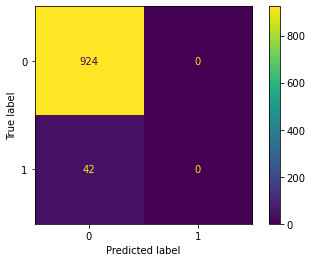

In [19]:
#print confusion matrix
cm = confusion_matrix(ytest, rounded_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [20]:
print(classification_report(ytest, rounded_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       924
           1       0.00      0.00      0.00        42

    accuracy                           0.96       966
   macro avg       0.48      0.50      0.49       966
weighted avg       0.91      0.96      0.94       966



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
